Read the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer

In [3]:
structured_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/structured_data.csv')
structured_df = structured_df.drop(columns=['subject_id', 'diagnosis'])

unstructured_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/unstructured_data.csv')
unstructured_df = unstructured_df.drop(columns=['text', 'description'])

In [4]:
structured_df.head()

,hadm_id,ABI_L_,ABI_R_,ABI_Ankle_BP_Left_mmHg,ABI_Ankle_BP_Right_mmHg,ABI_Brachial_BP_Left_mmHg,ABI_Brachial_BP_Right_mmHg,ABP_Alarm_High_mmHg,ABP_Alarm_Low_mmHg,AV_Interval_msec,...,pH_UNITS,pH_units,pO2_MM_HG,pO2_mm_Hg,tacroFK_ng/mL,gender,age_at_admission,in_hospital_timedays,ethnicity,hospital_expire_flag
0,100335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.34,NaN,91.0,NaN,M,86,10,WHITE,0
1,100848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.38,NaN,38.0,NaN,M,73,12,UNKNOWN/NOT SPECIFIED,0
2,101384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.42,NaN,41.0,NaN,F,73,7,WHITE,0
3,101708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.28,NaN,55.0,NaN,M,76,6,WHITE,1
4,102432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.44,5.50,29.0,NaN,NaN,M,83,12,UNKNOWN/NOT SPECIFIED,0


In [5]:
structured_df.tail()

,hadm_id,ABI_L_,ABI_R_,ABI_Ankle_BP_Left_mmHg,ABI_Ankle_BP_Right_mmHg,ABI_Brachial_BP_Left_mmHg,ABI_Brachial_BP_Right_mmHg,ABP_Alarm_High_mmHg,ABP_Alarm_Low_mmHg,AV_Interval_msec,...,pH_UNITS,pH_units,pO2_MM_HG,pO2_mm_Hg,tacroFK_ng/mL,gender,age_at_admission,in_hospital_timedays,ethnicity,hospital_expire_flag
227,199511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.48,NaN,42.0,NaN,F,68,30,BLACK/AFRICAN AMERICAN,1
228,199646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.00,NaN,73.0,NaN,M,86,34,WHITE,1
229,199806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.38,6.50,177.0,NaN,NaN,F,44,8,WHITE,0
230,199964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.41,NaN,52.0,NaN,NaN,F,59,12,BLACK/AFRICAN AMERICAN,0
231,199994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.27,NaN,104.0,NaN,F,58,10,WHITE,0


In [6]:
structured_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Columns: 462 entries, hadm_id to hospital_expire_flag
dtypes: float64(455), int64(5), object(2)
memory usage: 837.5+ KB


In [7]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', ' Missing Percent'])
    return missing_data

missing_data = missing_percentage(structured_df)
missing_data

,Total,Missing Percent
"Cholesterol,_Pleural_mg/dL",232,100.000000
"Heparin,_LMW_U/mL",232,100.000000
Factor_VII_%,232,100.000000
Valproic_Acid_ug/mL,231,99.568966
Orthostat_BP_sitting_Systolic_mmHg,231,99.568966
...,...,...
Platelet_Count_K/uL,0,0.000000
Potassium_mEq/L,0,0.000000
RDW_%,0,0.000000
Red_Blood_Cells_m/uL,0,0.000000


In [8]:
# Dropping fields which have more than 20% missing values

columns_to_drop = missing_data[missing_data[' Missing Percent'] > 20].index
structured_df = structured_df.drop(columns=columns_to_drop)
structured_df.head()

,hadm_id,Braden_Score_number,Calcium_84-102_mg/dl,GCS_Total_points,Heart_Rate_BPM,Hematocrit_%_x,Hemoglobin_gm/dl,NBP_Mean_mmHg,NBP_Diastolic_mmHg,NBP_Systolic_mmHg,...,Red_Blood_Cells_m/uL,Sodium_mEq/L,Urea_Nitrogen_mg/dL,White_Blood_Cells_K/uL,pH_units,gender,age_at_admission,in_hospital_timedays,ethnicity,hospital_expire_flag
0,100335,9.0,8.7,7.0,104.0,25.900000,8.7,75.333298,47.0,125.0,...,2.58,137.0,87.0,8.6,7.34,M,86,10,WHITE,0
1,100848,15.0,9.4,15.0,87.0,30.200001,10.1,60.333302,49.0,98.0,...,2.84,137.0,74.0,6.3,7.38,M,73,12,UNKNOWN/NOT SPECIFIED,0
2,101384,12.0,7.5,13.0,80.0,28.200001,8.5,63.000000,46.0,115.0,...,3.02,135.0,24.0,10.0,7.42,F,73,7,WHITE,0
3,101708,12.0,8.6,15.0,61.0,37.700001,11.1,55.666698,39.0,97.0,...,3.64,137.0,30.0,7.0,7.28,M,76,6,WHITE,1
4,102432,15.0,10.0,15.0,79.0,32.500000,10.5,67.000000,40.0,107.0,...,4.13,131.0,115.0,8.1,5.50,M,83,12,UNKNOWN/NOT SPECIFIED,0


In [9]:
#collapsing ethnicity

structured_df['ethnicity'] = structured_df['ethnicity'].replace({
    'UNKNOWN/NOT SPECIFIED': 'UNKNOWN',
    'OTHER': 'UNKNOWN',
    'PATIENT DECLINED TO ANSWER': 'UNKNOWN'
})

In [10]:
# Finding class balance for target variable

struct = structured_df['hospital_expire_flag'].value_counts()
unstruct = unstructured_df['hospital_expire_flag'].value_counts()

print(struct)
print(unstruct)

hospital_expire_flag
0    176
1     56
Name: count, dtype: int64
hospital_expire_flag
0    20958
1     4742
Name: count, dtype: int64


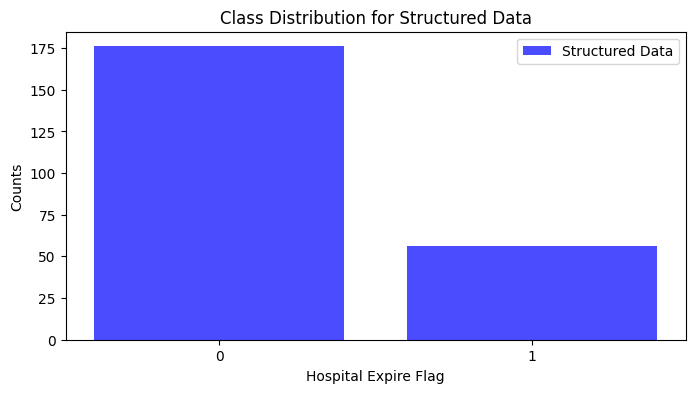

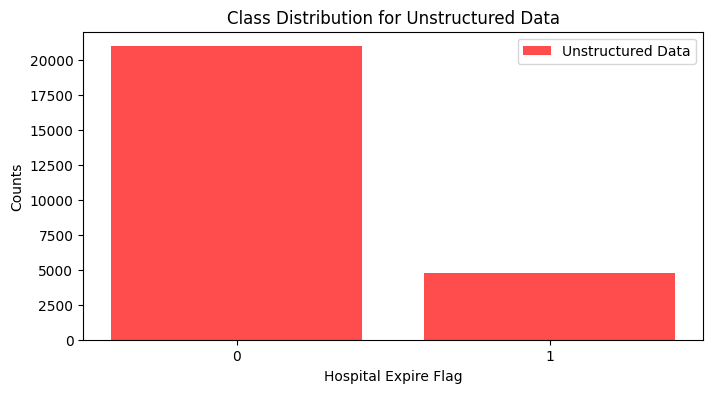

In [11]:
struct = structured_df['hospital_expire_flag'].value_counts().sort_index()
unstruct = unstructured_df['hospital_expire_flag'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
plt.bar(struct.index, struct.values, color='blue', alpha=0.7, label='Structured Data')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Counts')
plt.title('Class Distribution for Structured Data')
plt.xticks(struct.index)
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.bar(unstruct.index, unstruct.values, color='red', alpha=0.7, label='Unstructured Data')
plt.xlabel('Hospital Expire Flag')
plt.ylabel('Counts')
plt.title('Class Distribution for Unstructured Data')
plt.xticks(unstruct.index)
plt.legend()
plt.show()

In [12]:
numeric = ['age_at_admission', 'in_hospital_timedays', 'Braden_Score_number', 'Calcium_84-102_mg/dl', 'GCS_Total_points', 'Heart_Rate_BPM', 'Hematocrit_%_x', 'Hemoglobin_gm/dl',
           'NBP_Mean_mmHg', 'NBP_Diastolic_mmHg', 'NBP_Systolic_mmHg', 'O2_Flow_lpm_lpm', 'Phosphorous27-45_mEq/L', 'RBC_/mic_l', 'Respiratory_Rate_BPM', 'SpO2_%', 'Temperature_C_calc_Deg_C', 'Temperature_F_Deg_F',
           'calprevflg_kg', 'index', 'Alanine_Aminotransferase_ALT_IU/L', 'Albumin_g/dL', 'Anion_Gap_mEq/L', 'Asparate_Aminotransferase_AST_IU/L', 'Base_Excess_mEq/L', 'Basophils_%', 'Bicarbonate_mEq/L',
           'Bilirubin,_Total_mg/dL', 'Calcium,_Total_mg/dL', 'Chloride_mEq/L', 'Creatinine_mg/dL', 'Eosinophils_%', 'Glucose_mg/dL', 'Hematocrit_%_y', 'Hemoglobin_g/dL', 'Lymphocytes_%', 'MCH_pg', 'MCHC_%', 'MCV_fL',
           'Magnesium_mg/dL', 'Monocytes_%', 'Neutrophils_%', 'PTT_sec', 'Phosphate_mg/dL', 'Platelet_Count_K/uL', 'Potassium_mEq/L', 'RDW_%', 'Red_Blood_Cells_m/uL', 'Sodium_mEq/L', 'Urea_Nitrogen_mg/dL',
           'White_Blood_Cells_K/uL', 'pH_units']

In [13]:
categorical= ['gender', 'ethnicity']

# Logistic regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [15]:
# create dummy variables
df_dummies = pd.get_dummies(structured_df[categorical], drop_first=True)  # drop_first=True to avoid multicollinearity
df_final = pd.concat([structured_df.drop(categorical, axis=1), df_dummies], axis=1)
df_final

,hadm_id,Braden_Score_number,Calcium_84-102_mg/dl,GCS_Total_points,Heart_Rate_BPM,Hematocrit_%_x,Hemoglobin_gm/dl,NBP_Mean_mmHg,NBP_Diastolic_mmHg,NBP_Systolic_mmHg,...,White_Blood_Cells_K/uL,pH_units,age_at_admission,in_hospital_timedays,hospital_expire_flag,gender_M,ethnicity_BLACK/AFRICAN AMERICAN,ethnicity_HISPANIC OR LATINO,ethnicity_UNKNOWN,ethnicity_WHITE
0,100335,9.0,8.7,7.0,104.0,25.900000,8.7,75.333298,47.0,125.0,...,8.6,7.34,86,10,0,True,False,False,False,True
1,100848,15.0,9.4,15.0,87.0,30.200001,10.1,60.333302,49.0,98.0,...,6.3,7.38,73,12,0,True,False,False,True,False
2,101384,12.0,7.5,13.0,80.0,28.200001,8.5,63.000000,46.0,115.0,...,10.0,7.42,73,7,0,False,False,False,False,True
3,101708,12.0,8.6,15.0,61.0,37.700001,11.1,55.666698,39.0,97.0,...,7.0,7.28,76,6,1,True,False,False,False,True
4,102432,15.0,10.0,15.0,79.0,32.500000,10.5,67.000000,40.0,107.0,...,8.1,5.50,83,12,0,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,199511,10.0,7.9,10.0,104.0,23.900000,9.1,59.000000,51.0,79.0,...,18.0,7.48,68,30,1,False,True,False,False,False
228,199646,14.0,8.4,15.0,95.0,31.400000,11.1,68.333298,45.0,80.0,...,7.6,5.00,86,34,1,True,False,False,False,True
229,199806,12.0,8.5,6.0,82.0,28.799999,11.1,87.000000,41.0,145.0,...,3.2,6.50,44,8,0,False,False,False,False,True
230,199964,18.0,9.2,15.0,76.0,30.000000,7.8,103.333000,56.0,182.0,...,7.3,NaN,59,12,0,False,True,False,False,False


In [16]:
# deal with missing values
dummy_var_names = ['gender_M', 'ethnicity_BLACK/AFRICAN AMERICAN',
        'ethnicity_HISPANIC OR LATINO', 'ethnicity_UNKNOWN', 'ethnicity_WHITE']
# For numerical columns, replace NaNs with the mean
df_final[numeric] = df_final[numeric].fillna(df_final[numeric].mean())

In [17]:
#split dataset in features and target variable
x = df_final.drop('hospital_expire_flag', axis=1)
y = df_final['hospital_expire_flag'] # Target variable

In [18]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=16)

In [19]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.84


In [21]:
# Predict and evaluate the model
from sklearn.metrics import classification_report
predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.91        49
           1       0.50      0.67      0.57         9

    accuracy                           0.84        58
   macro avg       0.72      0.77      0.74        58
weighted avg       0.87      0.84      0.85        58



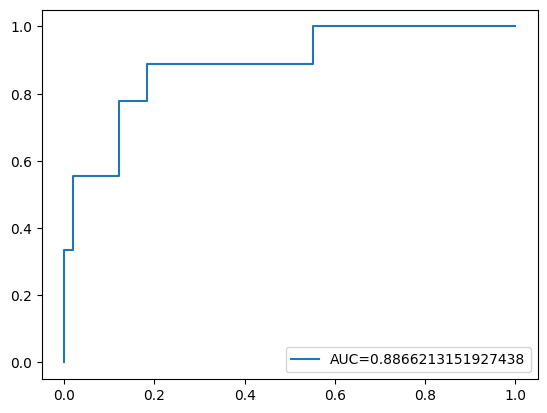

In [22]:
# import the metrics class
from sklearn import metrics
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

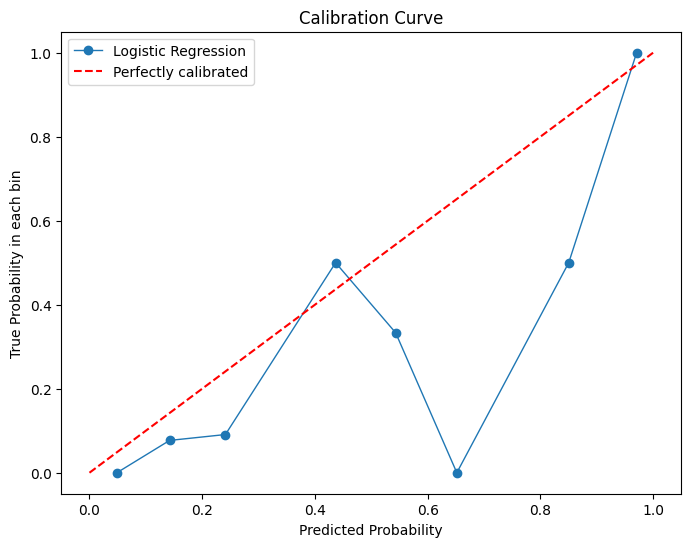

In [23]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Calibration curve
true_probas, pred_probas = calibration_curve(y_test, y_pred_proba, n_bins=10)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(pred_probas, true_probas, marker='o', linewidth=1, label='Logistic Regression')

# Reference line for a perfectly calibrated model
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Perfectly calibrated')

plt.title('Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability in each bin')
plt.legend()
plt.show()


# Elastic Net Regression

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegressionCV
# Basic LogisticRegression algorithm
elastic_net_classifier = LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga')
elastic_net_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

LogisticRegressionCV(cv=3, l1_ratios=[0.1, 0.5, 0.9], penalty='elasticnet',
                     solver='saga')

In [26]:
# SAGA should be considered more advanced and used over SAG.
# Test the model
print("Elasticnet: {}".format(elastic_net_classifier.score(X_test, y_test)))

Elasticnet: 0.896551724137931


In [27]:
# Print out some more metrics
print("Elastic Net")
print(classification_report(y_test, elastic_net_classifier.predict(X_test)))

Elastic Net
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.67      0.67      0.67         9

    accuracy                           0.90        58
   macro avg       0.80      0.80      0.80        58
weighted avg       0.90      0.90      0.90        58



In [28]:
from sklearn.model_selection import GridSearchCV
# perform grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Balance between l1 and l2 regularization
}
model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # cv is the number of folds

In [29]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             scoring='accuracy')

In [30]:
# find the best parameters
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'l1_ratio': 0.25}
Best cross-validation score: 0.84


In [31]:
# use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        49
           1       0.67      0.67      0.67         9

    accuracy                           0.90        58
   macro avg       0.80      0.80      0.80        58
weighted avg       0.90      0.90      0.90        58



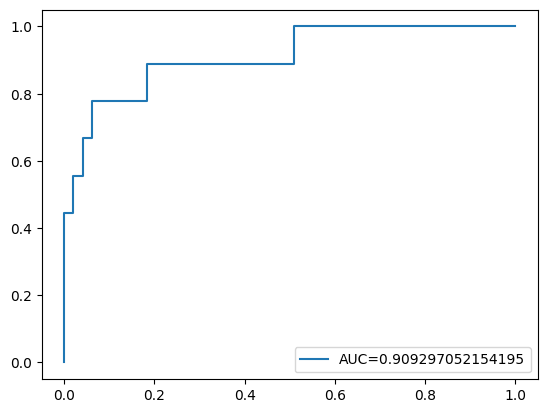

In [32]:
# import the metrics class
from sklearn import metrics
y_pred_proba = best_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

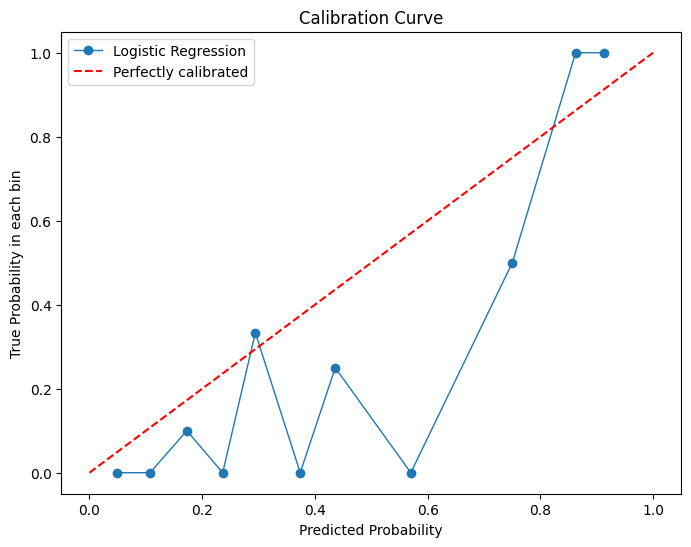

In [33]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Calibration curve
true_probas, pred_probas = calibration_curve(y_test, y_pred_proba, n_bins=15)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(pred_probas, true_probas, marker='o', linewidth=1, label='Logistic Regression')

# Reference line for a perfectly calibrated model
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Perfectly calibrated')

plt.title('Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability in each bin')
plt.legend()
plt.show()